In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.manifold import TSNE

In [3]:
# Load Data
df = pd.read_csv("../data/student_habits_performance.csv")

In [5]:
# Preprocessing

# Encode categorical features
categorical_cols = ['gender', 'part_time_job', 'diet_quality',
                    'parental_education_level', 'internet_quality',
                    'extracurricular_participation']

df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Drop student_id (not useful for prediction)
df_encoded = df_encoded.drop(columns=['student_id'])

# Separate features and target
X = df_encoded.drop(columns=['exam_score'])
y = df_encoded['exam_score']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Cell 4: Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 6.281891295621091
R² Score: 0.8461088898819811


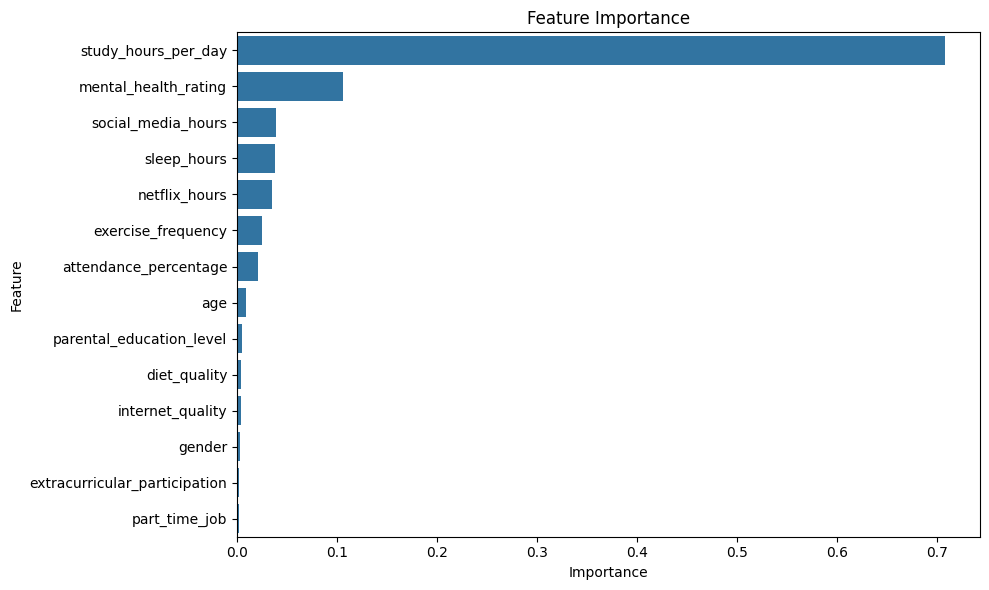

In [9]:
# Cell 5: Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# t-SNE
We will analyze the data by using a t-SNE plot and see if there are any meaningful clusters among the students.

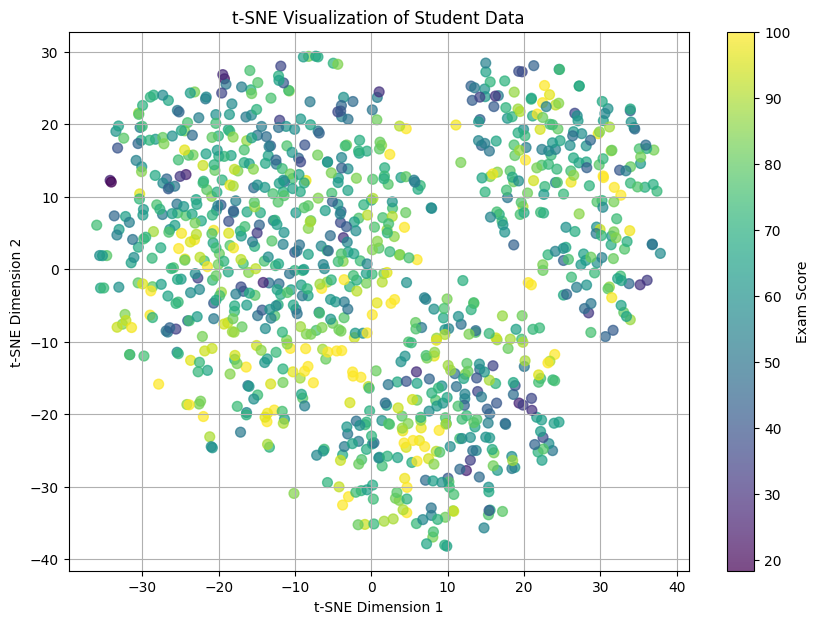

In [10]:
# Cell 6: t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE
plt.figure(figsize=(10,7))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Exam Score')
plt.title('t-SNE Visualization of Student Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


In [11]:
from sklearn.cluster import KMeans

# Choose 3 clusters (since you observed 3)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_tsne)

# Add to original DataFrame for analysis
df_encoded['cluster'] = cluster_labels


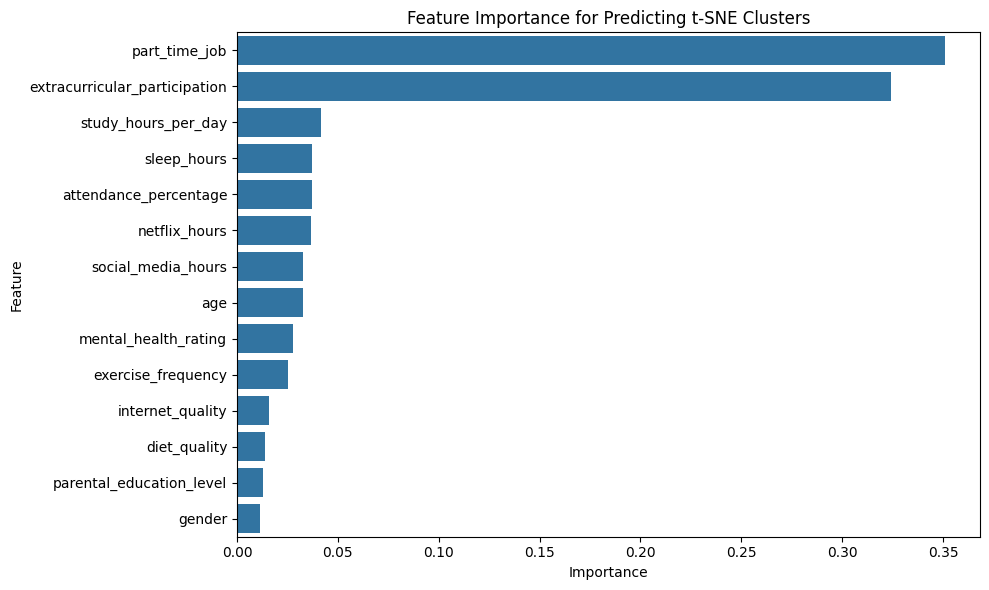

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_scaled, cluster_labels)

# Show feature importances for cluster prediction
importances = clf.feature_importances_
cluster_feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
cluster_feat_imp = cluster_feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=cluster_feat_imp)
plt.title('Feature Importance for Predicting t-SNE Clusters')
plt.tight_layout()
plt.show()


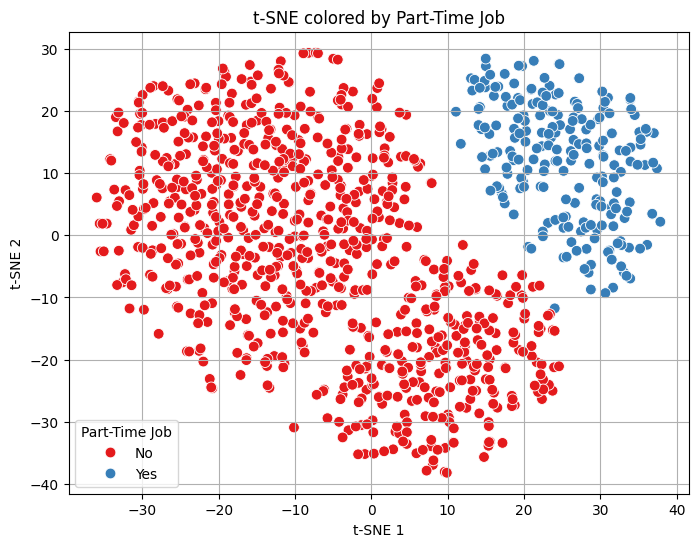

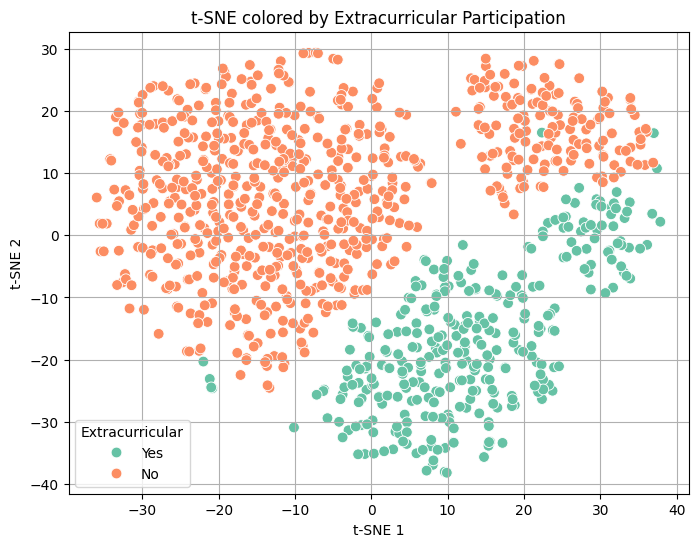

In [17]:
# Plot t-SNE colored by part_time_job
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1],
                hue=df['part_time_job'],
                palette='Set1', s=60)
plt.title('t-SNE colored by Part-Time Job')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Part-Time Job')
plt.grid(True)
plt.show()

# Plot t-SNE colored by extracurricular_participation
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1],
                hue=df['extracurricular_participation'],
                palette='Set2', s=60)
plt.title('t-SNE colored by Extracurricular Participation')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Extracurricular')
plt.grid(True)
plt.show()

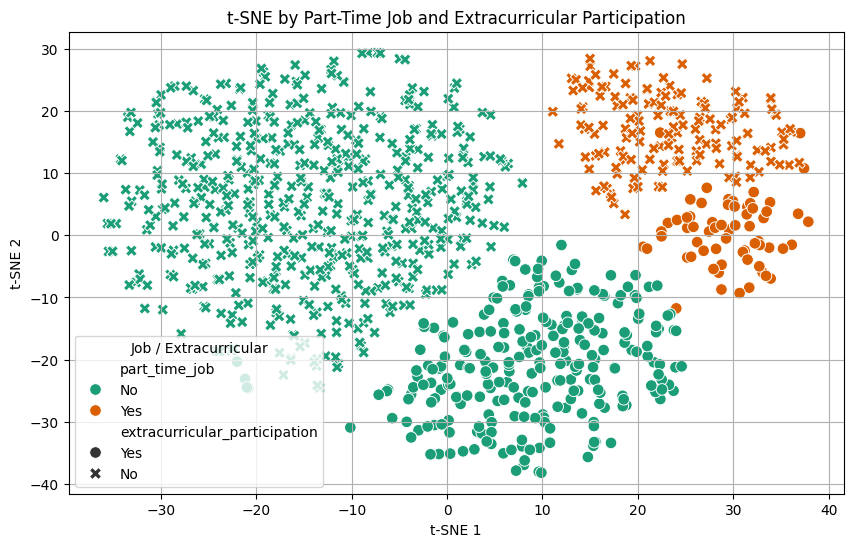

In [18]:
# Combined coloring and marker style
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=df['part_time_job'],
    style=df['extracurricular_participation'],
    palette='Dark2', s=70
)
plt.title('t-SNE by Part-Time Job and Extracurricular Participation')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Job / Extracurricular')
plt.grid(True)
plt.show()


# Prediction Model
We then predict the exam score, based on the 6 most important features.

In [6]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Select only the required features and target
selected_features = [
    'study_hours_per_day',
    'mental_health_rating',
    'social_media_hours',
    'sleep_hours',
    'netflix_hours',
    'exercise_frequency',
    'attendance_percentage'
]

X = df[selected_features]
y = df['exam_score']

In [8]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [10]:
# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 6.12
R² Score: 0.85


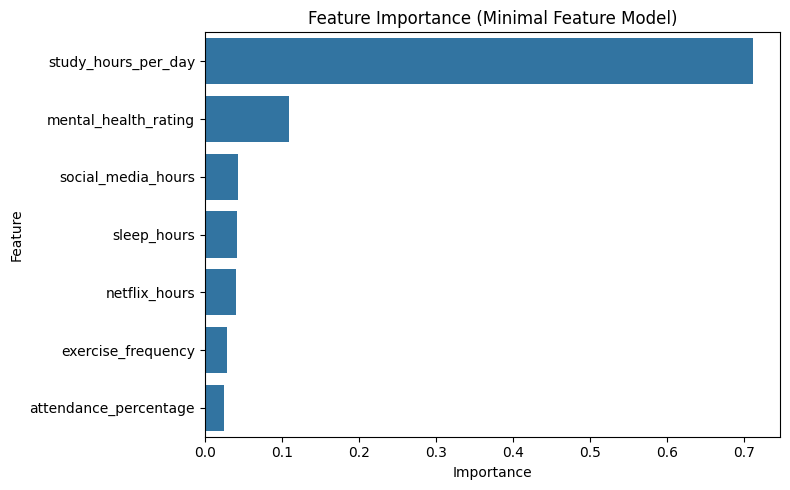

In [11]:
# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Minimal Feature Model)')
plt.tight_layout()
plt.show()


In [18]:
# Create a sample student and predict

# Define a sample student — change these values to test different profiles
sample_student = pd.DataFrame([{
    'study_hours_per_day': 1.5,
    'mental_health_rating': 1,
    'social_media_hours': 1.5,
    'sleep_hours': 5.0,
    'netflix_hours': 10,
    'exercise_frequency': 10,
    'attendance_percentage': 10
}])

# Scale the input the same way as training data
sample_scaled = scaler.transform(sample_student)

# Predict
predicted_score = model.predict(sample_scaled)[0]
print(f"Predicted Exam Score: {predicted_score:.2f}")


Predicted Exam Score: 43.92


In [24]:
import joblib

# Save the trained pipeline (model + preprocessor)
joblib.dump(model, '../models/prediction_model_small_data.pkl')

['../models/prediction_model_small_data.pkl']